In [1]:
import numpy as np
import matplotlib.pyplot as plt

def write_pseudovoight(A,x,w=5,nu=0.5,spec_len=500,x_max=500):
    x_ = np.linspace(0,x_max-1,spec_len)
    y = A*( nu*np.pi/2/((x-x_)**2+(nu*np.pi/2)**2) \
        +(1-nu)*(np.exp(-4*np.log(2)*(x-x_)**2/w**2)) )
    return y

def add_noise(I,y,noise=0.1,spec_len=500):
    noise = np.random.normal(0, noise*(I), spec_len) # make some noise even if 0
    return y + noise

x_,y_ = (50,50)
mask = np.zeros((x_,y_))
mask[10:,10:] = 1



In [3]:
from tqdm import tqdm
import h5py
datapath = '/home/m3learning/Northwestern/Northwestern_link/model_tests/fake_pv_curves/'

fwhm, nu_ = 50, 0.7


In [11]:

def pv_area(I,w,nu):
   return I*w*np.pi/2/ ((1-nu)*(np.pi*np.log(2))**0.5 + nu)

with h5py.File(f'{datapath}fake_pv_data.h5','a') as f:
    for i in tqdm(range(20)):
        noise_ = i**(1.5) 
        try: dset = f[f'{noise_:0.3d}_noise']
        except: dset = f.create_dataset(f'{noise_}_noise', shape=(50,50,500), dtype=np.float32)
        for x_ in range(50):
            for y_ in range(50):
                I = y_/5
                A = pv_area(I, w=fwhm, nu=nu_)
                if mask[x_, y_]:
                    dset[x_, y_] = add_noise(I,
                                            write_pseudovoight(A, x_*2, fwhm, nu_),
                                            noise = noise_)
                else: dset[x_, y_] = add_noise(I,
                                               np.zeros(500),
                                               noise = noise_)


100%|██████████| 20/20 [00:08<00:00,  2.40it/s]


In [12]:
# i,x,y,s = 0,20,20,200
# noise_ = i**(1.5)
# with h5py.File(f'{datapath}fake_pv_data.h5','a') as f:
#     dset = f[f'{noise_}_noise'][:]
#     plt.imshow(dset[:,:,s],origin='lower')
#     plt.plot(y,x,'ro')
#     plt.colorbar()
#     plt.show()
#     plt.plot(dset[x,y,:])
#     plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
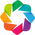

KeyError: "Unable to open object (object '0.0625_noise' doesn't exist)"

Column
    [0] Row
        [0] IntSlider(end=19, name='Noise level')
        [1] IntSlider(end=499, name='spectral value')
    [1] Row
        [0] IntSlider(end=49, name='y', value=25)
        [1] IntSlider(end=49, name='x', value=25)
    [2] HoloViews(Layout)

In [13]:
import holoviews as hv
import panel as pn
from functools import lru_cache

hv.extension('bokeh')
pn.extension('bokeh')

@lru_cache(maxsize=10)
def select_datacube(i):
    with h5py.File(f'{datapath}fake_pv_data.h5','r') as f:
        return f[f'{2**(i-4)}_noise'][:]
 
def plot_datacube_img(i,s):
    datacube = select_datacube(i)
    return hv.Image(datacube[:,:,s], bounds=(0,0,50,50),
                    ).opts(cmap='viridis', colorbar=True, clim=(0, datacube.max()),
                           width=350, height=300)
    
def plot_datacube_spectrum(i, x, y):
    datacube = select_datacube(i)
    return hv.Curve(datacube[x,y],
                    ).opts(width=350, height=300,
                           ylim=(0, datacube.max()), xlim=(0, 500))
    
def show_dot(x, y): return hv.Scatter([(x,y)]).opts(
                                            color='red', size=5, marker='o',
                                            )
def show_vline(s): return hv.VLine(int(s)).opts(
                                    color='black', line_width=2,
                                    )
    
i_slider = pn.widgets.IntSlider(name='Noise level', value=0, start=0, end=19)
x_slider = pn.widgets.IntSlider(name='y', value=25, start=0, end=49)
y_slider = pn.widgets.IntSlider(name='x', value=25, start=0, end=49)
s_slider = pn.widgets.IntSlider(name='spectral value', value=0, start=0, end=499)

img_dmap = hv.DynamicMap( pn.bind(plot_datacube_img, i=i_slider, s=s_slider) )
spec_dmap = hv.DynamicMap( pn.bind(plot_datacube_spectrum, i=i_slider, x=x_slider, y=y_slider))

dot_dmap = hv.DynamicMap( pn.bind(show_dot, x=x_slider, y=y_slider) )
vline_dmap = hv.DynamicMap( pn.bind(show_vline, s=s_slider) )

dmap = pn.Column(pn.Row(i_slider,s_slider),
                 pn.Row(x_slider,y_slider),
                 (img_dmap*dot_dmap + spec_dmap*vline_dmap).opts(shared_axes=False) )
dmap

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
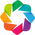

<KeysViewHDF5 ['0.0_noise', '1.0_noise', '11.180339887498949_noise', '14.696938456699069_noise', '18.520259177452136_noise', '2.8284271247461903_noise', '22.627416997969522_noise', '27.0_noise', '31.622776601683793_noise', '36.4828726939094_noise', '41.569219381653056_noise', '46.87216658103186_noise', '5.196152422706632_noise', '52.38320341483518_noise', '58.09475019311125_noise', '64.0_noise', '70.09279563550022_noise', '76.36753236814714_noise', '8.0_noise', '82.8190799272728_noise']>


BokehModel(combine_events=True, render_bundle={'docs_json': {'303952d2-c13a-4882-92a8-c907c12e34ee': {'version…

<KeysViewHDF5 ['0.0_noise', '1.0_noise', '11.180339887498949_noise', '14.696938456699069_noise', '18.520259177452136_noise', '2.8284271247461903_noise', '22.627416997969522_noise', '27.0_noise', '31.622776601683793_noise', '36.4828726939094_noise', '41.569219381653056_noise', '46.87216658103186_noise', '5.196152422706632_noise', '52.38320341483518_noise', '58.09475019311125_noise', '64.0_noise', '70.09279563550022_noise', '76.36753236814714_noise', '8.0_noise', '82.8190799272728_noise']>
<KeysViewHDF5 ['0.0_noise', '1.0_noise', '11.180339887498949_noise', '14.696938456699069_noise', '18.520259177452136_noise', '2.8284271247461903_noise', '22.627416997969522_noise', '27.0_noise', '31.622776601683793_noise', '36.4828726939094_noise', '41.569219381653056_noise', '46.87216658103186_noise', '5.196152422706632_noise', '52.38320341483518_noise', '58.09475019311125_noise', '64.0_noise', '70.09279563550022_noise', '76.36753236814714_noise', '8.0_noise', '82.8190799272728_noise']>
<KeysViewHDF5 

In [14]:
import holoviews as hv
import panel as pn
from functools import lru_cache
import h5py

hv.extension('bokeh')
pn.extension('bokeh')

@lru_cache(maxsize=10)
def select_datacube(i):
    noise_ = i**(1.5)
    with h5py.File(f'{datapath}fake_pv_data.h5','a') as f:
        print(f.keys())
        return f[f'{noise_}_noise'][:]

def plot_datacube_img(i, s):
    datacube = select_datacube(i)
    return hv.Image(datacube[:, :, s].T, bounds=(0, 50, 50, 0),
                    kdims=[hv.Dimension('x', label='X Position'), hv.Dimension('y', label='Y Position')],
                    vdims=[hv.Dimension('intensity', label='Intensity')]
                    ).opts(cmap='viridis', colorbar=True, clim=(0, datacube.max()),
                           width=350, height=300)

def plot_datacube_spectrum(i, x, y):
    datacube = select_datacube(i)
    return hv.Curve(datacube[x, y],
                    kdims=[hv.Dimension('spectrum', label='Spectrum Value')],
                    vdims=[hv.Dimension('intensity', label='Intensity')]
                    ).opts(width=350, height=300,
                           ylim=(0, datacube.max()), xlim=(0, 500))

def show_dot(x, y): 
    return hv.Scatter([(x, y)]).opts( color='red', size=5, marker='o',
                                     axiswise=True, shared_axes=False)

def show_vline(s): 
    return hv.VLine(int(s)).opts(
        color='black', line_width=2,
        axiswise=True, shared_axes=False)
    

# Create interactive widgets
i_slider = pn.widgets.IntSlider(name='Noise level', value=0, start=0, end=19)
x_slider = pn.widgets.IntSlider(name='x', value=25, start=0, end=49)
y_slider = pn.widgets.IntSlider(name='y', value=25, start=0, end=49)
s_slider = pn.widgets.IntSlider(name='spectral value', value=0, start=0, end=499)

# Create dynamic maps for image and spectrum plots
img_dmap = hv.DynamicMap(pn.bind(plot_datacube_img, i=i_slider, s=s_slider))
spec_dmap = hv.DynamicMap(pn.bind(plot_datacube_spectrum, i=i_slider, x=x_slider, y=y_slider))

# Dynamic maps for the red dot and vertical line
dot_dmap = hv.DynamicMap(pn.bind(show_dot, x=x_slider, y=y_slider))
vline_dmap = hv.DynamicMap(pn.bind(show_vline, s=s_slider))

# Layout with widgets and plots
dmap = pn.Column(
    pn.Row(i_slider, s_slider),
    pn.Row(x_slider, y_slider),
    (img_dmap * dot_dmap + spec_dmap * vline_dmap).opts(shared_axes=False)
)

dmap.servable()
